In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Data

In [3]:
path_to_file = "Shakespeare.txt"
text = open(path_to_file, 'r').read()

In [5]:
tokenizer = Tokenizer()

In [6]:
corpus = text.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [23]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [24]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [25]:
input_sequences

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]])

In [32]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

In [33]:
predictors

array([[   0,    0,    0, ...,    0,    0,   34],
       [   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       ...,
       [   0,    0,    0, ..., 3209,  493,  493],
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15]])

In [34]:
label

array([ 417,  877,  166, ..., 3210,   15,   14])

In [35]:
label = ku.to_categorical(label, num_classes=total_words)

In [36]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [38]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 12s 744us/sample - loss: 6.8988 - accuracy: 0.0219
Epoch 2/100
15462/15462 [==============================] - 4s 289us/sample - loss: 6.4973 - accuracy: 0.0228
Epoch 3/100
15462/15462 [==============================] - 4s 287us/sample - loss: 6.3767 - accuracy: 0.0266
Epoch 4/100
15462/15462 [==============================] - 4s 290us/sample - loss: 6.2565 - accuracy: 0.0337
Epoch 5/100
15462/15462 [==============================] - 4s 289us/sample - loss: 6.1614 - accuracy: 0.0384
Epoch 6/100
15462/15462 [==============================] - 4s 291us/sample - loss: 6.0893 - accuracy: 0.0402
Epoch 7/100
15462/15462 [==============================] - 4s 287us/sample - loss: 6.0062 - accuracy: 0.0413 - loss: 6
Epoch 8/100
15462/15462 [==============================] - 5s 291us/sample - loss: 5.9117 - accuracy: 0.0451
Epoch 9/100
15462/15462 [==============================] - 4s 290us/sample - loss: 5.8011 - ac

15462/15462 [==============================] - 5s 319us/sample - loss: 1.4426 - accuracy: 0.7495
Epoch 75/100
15462/15462 [==============================] - 5s 320us/sample - loss: 1.4144 - accuracy: 0.7552
Epoch 76/100
15462/15462 [==============================] - 5s 320us/sample - loss: 1.4029 - accuracy: 0.7593
Epoch 77/100
15462/15462 [==============================] - 5s 321us/sample - loss: 1.3856 - accuracy: 0.7637
Epoch 78/100
15462/15462 [==============================] - 5s 323us/sample - loss: 1.3790 - accuracy: 0.7626
Epoch 79/100
15462/15462 [==============================] - 5s 319us/sample - loss: 1.3770 - accuracy: 0.7604
Epoch 80/100
15462/15462 [==============================] - 5s 321us/sample - loss: 1.3648 - accuracy: 0.7620
Epoch 81/100
15462/15462 [==============================] - 5s 323us/sample - loss: 1.3365 - accuracy: 0.7689
Epoch 82/100
15462/15462 [==============================] - 5s 323us/sample - loss: 1.2935 - accuracy: 0.7784
Epoch 83/100
15462/1546

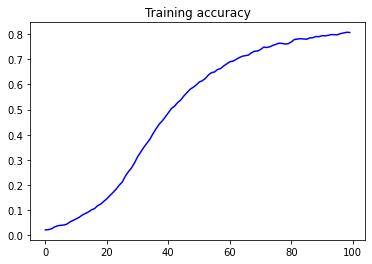

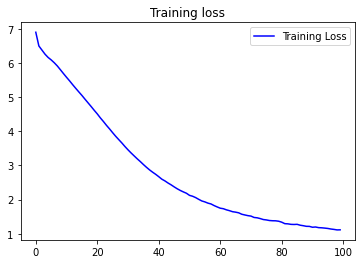

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [47]:
seed_text = "King"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

King thou gavest thy art in this women's foot on grow level days exchanged toil'd light twain light twain twain new last on place place forth pride for slain slain bright ' alone so gone so still still so rare kind still old rare spent still back hence gems one dyed still new remain grow new dead moan me now so dwell so erred twain near woe moan tongue lack rage quite grow leaves light shine on hate quite night alone relief relief relief dyed moan me pain alone so rare alone on thee still so dwell have last none none
